In [1]:
import numpy as np
from astropy.table import Table, Column, join
from astropy.coordinates import SkyCoord
from astropy.table import Column
from numpy import *
import matplotlib.pyplot as plt
%matplotlib inline

from astropy.wcs import WCS
from astropy.io import fits

from matplotlib.colors import LogNorm

from astropy.utils.data import download_file



catalog_path='/Users/EvanB.LAPTOP-8CHCIOMA/Downloads/'

#A100-NSA Catalog
myTab=Table.read(catalog_path+'a100-nsa-for-adap.fits')

In [2]:
# SNR cut: GALEX NUV or WISE 12um SNR > 20
snrmin = 20
W3snr = myTab['w3_nanomaggies']
W3snr_ivar = myTab['w3_nanomaggies_ivar']
W3snr = W3snr*np.sqrt(W3snr_ivar)
W3flag = (W3snr>snrmin) | (myTab['W3SNR']>snrmin)
GALEXsnr = myTab['NMGY'][:,1]
GALEXsnr_ivar = myTab['NMGY_IVAR'][:,1]
GALEXsnr = GALEXsnr*np.sqrt(GALEXsnr_ivar)
NUVflag = GALEXsnr>snrmin
SNRflag = W3flag | NUVflag

In [3]:
myTab['w3_nanomaggies'].info

name = w3_nanomaggies
dtype = float32
class = MaskedColumn
n_bad = 1208
length = 39098

In [4]:
# Size cut: r-band effective radii greater than two pixels (> 6.500" ) in the unWISE images
radmin = 6.500
rad_eff1 = myTab['SERSIC_TH50']
rad_eff2 = myTab['petroR50_r']
sizeflag = (rad_eff1>radmin) | (rad_eff2>radmin)

In [5]:
# Redshift cut: 0.002 < z < 0.025
zmin=0.002
zmax=0.025
redshift = myTab['ZDIST']
vhelio = myTab['Vhelio']
redshiftflag = (redshift>zmin) & (redshift<zmax)
vhelioflag = (vhelio>zmin*3e5) & (vhelio<zmax*3e5)
zflag = redshiftflag | vhelioflag

In [6]:
# Apply cuts
NSFcut = SNRflag & sizeflag & zflag
cuttab=myTab[NSFcut]
cuttab.columns

<TableColumns names=('AGC','Name','OrigSrcName','HISrcName','RAdeg_HI','DECdeg_HI','RAdeg_OC','DECdeg_OC','RAdeg_Use','DECdeg_Use','Vhelio','sigV','W50','sigWtot','sigWstat','W20','HIflux','sigflux','SNR','RMS','Dist','sigdist','logMH','siglogMH','HIcode','objID_1','parentID','specObjID','ra_1','dec_1','modelMag_u','modelMag_g','modelMag_r','modelMag_i','modelMag_z','modelMagErr_u','modelMagErr_g','modelMagErr_r','modelMagErr_i','modelMagErr_z','cModelMag_u','cModelMag_g','cModelMag_r','cModelMag_i','cModelMag_z','cModelMagErr_u','cModelMagErr_g','cModelMagErr_r','cModelMagErr_i','cModelMagErr_z','petroMag_u','petroMag_g','petroMag_r','petroMag_i','petroMag_z','petroMagErr_u','petroMagErr_g','petroMagErr_r','petroMagErr_i','petroMagErr_z','petroRad_u','petroRad_g','petroRad_r','petroRad_i','petroRad_z','petroR50_g','petroR50_r','petroR50_i','petroR90_g','petroR90_r','petroR90_i','extinction_u','extinction_g','extinction_r','extinction_i','extinction_z','expAB_g','expAB_r','expAB_i','ex

In [7]:
cuttab['DEC']

21.96023277138855
16.14570390458945
22.10303767798473
29.797254072778514
0.0
7.478712826084568
15.218606641386561
20.752409988851024
7.3794403086104925
6.177659647258969
31.47201338572764


12632


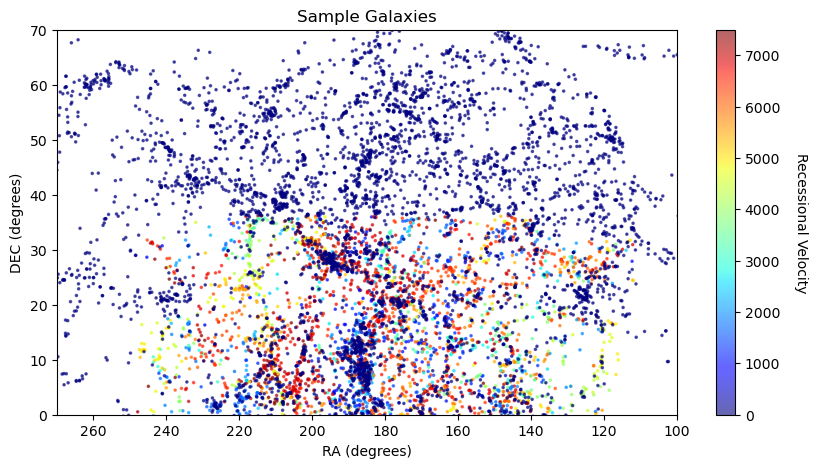

In [8]:
#Define positional and color data
ra = cuttab['RA']
dec = cuttab['DEC']
ccode = cuttab['Vhelio']

#Print number of points
print(len(ra))

#Plot RA vs DEC and color it by recessional velocity
plt.figure(figsize=(10,5))
plt.scatter(ra,dec,c=ccode,cmap='jet',alpha=0.6,s=2.5)
plt.xlim(reversed(plt.xlim()))
plt.title('Sample Galaxies')
plt.xlabel('RA (degrees)')
plt.ylabel('DEC (degrees)')
plt.xlim(270,100)
plt.ylim(0,70)
cbar = plt.colorbar()
cbar.set_label('Recessional Velocity',rotation=270,labelpad=20)

C:\Users\EvanB.LAPTOP-8CHCIOMA\AppData\Local\Temp\ipykernel_7444\1081430918.py:7: RuntimeWarning: divide by zero encountered in log10
  plt.scatter(np.log10(x),y,s=4,color='black')


12632


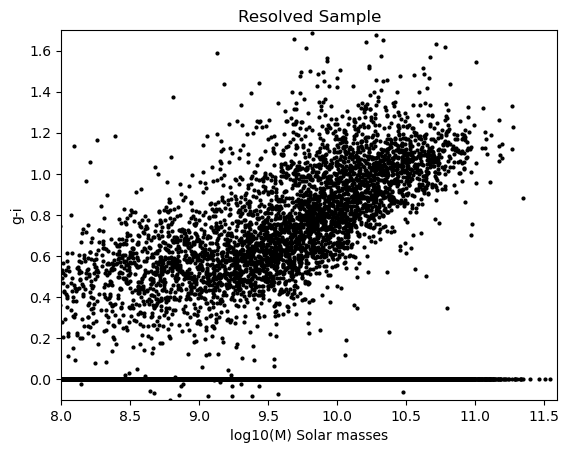

In [14]:
#Define x data as mass and y data as g-i
x = cuttab['MASS']
y = cuttab['gmi_corr'] #cuttab['gmag_corr']-cuttab['imag_corr']

#Plot mass vs color
plt.title('Resolved Sample')
plt.scatter(np.log10(x),y,s=4,color='black')
plt.ylim(-0.1,1.7)
plt.xlim(8,11.6)
plt.xlabel('log10(M) Solar masses')
plt.ylabel('g-i')
print(len(cuttab['gmi_corr']))

In [11]:
myTab.close()

NameError: name 'hdu_list' is not defined